In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io, filters
from skimage.segmentation import watershed
from skimage.filters import sobel
from skimage.measure import label, regionprops

In [33]:
#get predictions for specified year
year = '2017'
data = np.load('/home/esther/shared/preds_' + year + '.npz')
date_loc_list = list(data)
print(date_loc_list)

['2017-03-08_grassmtn', '2017-03-15_antelope', '2017-03-25_antelope', '2017-03-28_grassmtn', '2017-04-04_antelope', '2017-04-14_antelope', '2017-04-24_antelope', '2017-04-27_grassmtn']


In [34]:
areas_dict = {}
centroids_dict = {}

for key in date_loc_list:

    #pull prediction
    preds = data[key]

    #apply gaussian blur to predictions
    tmp = filters.gaussian(preds, sigma=10)

    #get markers of poppy and no poppy
    markers = np.zeros_like(tmp)
    markers[tmp < 0.1] = 1
    markers[tmp > 0.5] = 2

    #generate elevation map
    elevation_map = sobel(tmp)

    #segment the image
    segmentation = watershed(elevation_map, markers)

    #get labels of segments
    labeled = label(segmentation)

    #get list of all areas in this image
    areas_list = [region.area for region in regionprops(labeled)]
    centroids_list = [region.centroid for region in regionprops(labeled)]

    #store in dictionary
    areas_dict[key] = areas_list
    centroids_dict[key] = centroids_list

print(areas_dict)

{'2017-03-08_grassmtn': [640338], '2017-03-15_antelope': [569449], '2017-03-25_antelope': [569449], '2017-03-28_grassmtn': [640338], '2017-04-04_antelope': [557560, 11889], '2017-04-14_antelope': [569449], '2017-04-24_antelope': [569449], '2017-04-27_grassmtn': [640338]}


In [35]:
#save as npz
np.savez('/home/esther/poppy-finder/data/areas_' + year, **areas_dict)
np.savez('/home/esther/poppy-finder/data/centroids_' + year, **centroids_dict)

## Code below is to visualize segmentation process for an individual image

In [16]:
#get images for visualization
imgs_list = []
for name in date_loc_list:
    
    filename = '/home/esther/shared/' + name + '.npy'
    img = np.load(filename)
    imgs_list.append(img)

In [19]:
n = 21
key = date_loc_list[n]
preds = data[key]

#apply gaussian blur to predictions
tmp = filters.gaussian(preds, sigma=10)

#get markers of poppy and no poppy
markers = np.zeros_like(tmp)
markers[tmp < 0.1] = 1
markers[tmp > 0.5] = 2

#generate elevation map
elevation_map = sobel(tmp)

#segment
segmentation = watershed(elevation_map, markers)

#get labels of segments
labeled = label(segmentation)

#get list of all areas in this image
areas_list = [region.area for region in regionprops(labeled)]
centroids_list = [region.centroid for region in regionprops(labeled)]

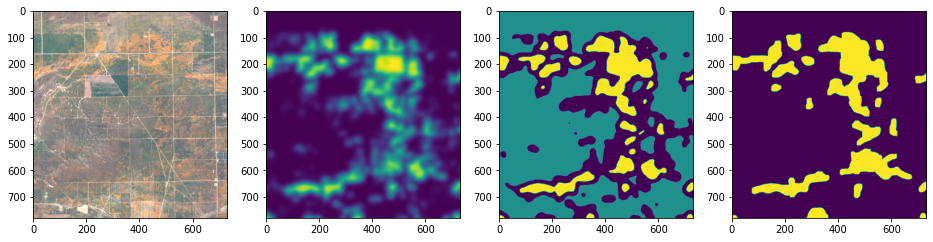

In [24]:
#visualize
fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(np.minimum(imgs_list[n][:,:,[3,2,1]]*5, 1))
axs[1].imshow(tmp)
axs[2].imshow(markers)
axs[3].imshow(segmentation);

In [25]:
centroids_list

[(393.50796705850536, 358.3899675486559),
 (216.315982547314, 458.9918294750299),
 (114.90252454417953, 233.02138849929875),
 (128.64905660377357, 553.2811320754716),
 (176.41498356035697, 106.20620009394082),
 (186.7308503162333, 284.3028812368236),
 (220.9121951219512, 198.86368563685636),
 (254.6228287841191, 708.7816377171216),
 (288.31854379977244, 164.2457337883959),
 (349.10297239915076, 289.6263269639066),
 (343.77236842105265, 547.5513157894737),
 (438.4422952933591, 604.7962604771116),
 (455.39187574671445, 502.44444444444446),
 (579.6429476618933, 530.8683310100114),
 (655.9804028307022, 224.14171656686628),
 (663.1708930540243, 716.148842337376),
 (674.1375623663578, 470.83392729864573),
 (761.2409972299168, 320.1080332409972),
 (770.0454545454545, 715.9116161616162),
 (773.3980099502487, 8.786069651741293)]